In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True,formatter={'float_kind':'{:0.2f}'.format})
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
dataset = pd.read_csv('Social_Network_Ads.csv')

In [18]:
X = dataset.iloc[:,[2,3]].values
y = dataset.iloc[:,-1].values

In [15]:
# data spliting
from sklearn.model_selection import train_test_split

In [38]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25)

In [20]:
from sklearn.preprocessing import StandardScaler

In [76]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
classifier = LogisticRegression()

In [79]:
classifier.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [42]:
#predicting
y_pred = classifier.predict(X_test)

In [44]:
classifier.score(X_test,y_test)

0.83

In [36]:
y_test

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0])

In [43]:
y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [45]:
from sklearn.metrics import confusion_matrix

In [46]:
cm = confusion_matrix(y_test,y_pred)

Text(0, 0.5, 'Salary')

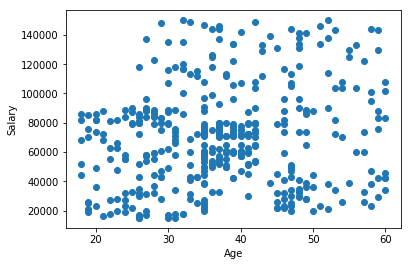

In [49]:
plt.scatter(X[:,0],X[:,1])
plt.xlabel('Age')
plt.ylabel('Salary')

Text(0, 0.5, 'Salary')

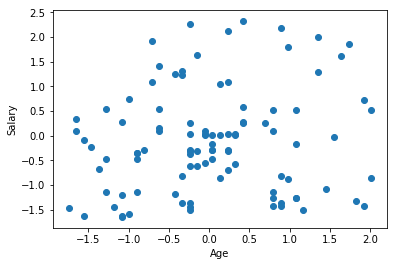

In [50]:
plt.scatter(X_test[:,0],X_test[:,1])
plt.xlabel('Age')
plt.ylabel('Salary')

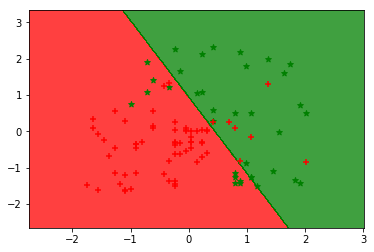

In [75]:
from matplotlib.colors import ListedColormap
x_set,y_set = X_test,y_test

x1,x2 = np.meshgrid(np.arange(start = x_set[:,0].min()-1,stop = x_set[:,0].max()+1,step = 0.01),

                    np.arange(start = x_set[:,1].min()-1,stop = x_set[:,1].max()+1,step = 0.01))

plt.contourf(x1,x2,classifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),

             alpha = 0.75,cmap = ListedColormap(('red','green')))
salary = []
age = []
for i in range(len(y_test)):
    if y_test[i] == 1:
        salary.append(X_test[i,0])
        age.append(X_test[i,1])
plt.scatter(salary,age,color = 'green',marker = '*')

salary = []
age = []
for i in range(len(y_test)):
    if y_test[i] == 0:
        salary.append(X_test[i,0])
        age.append(X_test[i,1])
plt.scatter(salary,age,color = 'red',marker = '+')
